## Standardizing the player direction on the field
A python version

In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

homedir = os.environ['HOME']
datapath = os.path.join(
    homedir, 'dev/NflBigData/data/kaggle/train.csv'
)

data = pd.read_csv(datapath, low_memory=False)

In [2]:
data.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
# define filters
to_left = data['PlayDirection'] == 'left'
dir_small = data['Dir'] < 90
dir_big = data['Dir'] > 270

In [4]:
# Add some new columns for extracting rusher data and standardizing direction
data['IsBallCarrier'] = data['NflId'] == data['NflIdRusher']
data['Dir_std_1'] = (
    ((to_left & dir_small) * 360) + data['Dir'] - ((~to_left & dir_big) * 360)
)
data['Dir_std_2'] = data['Dir_std_1'] - (to_left * 180)

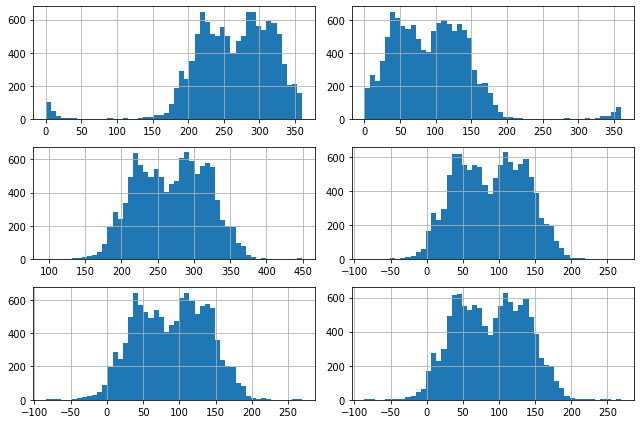

In [5]:
rusher_data = data[data['IsBallCarrier'] == True]
fig, ax = plt.subplots(3, 2, figsize=(9,6))

rusher_data['Dir'][rusher_data['PlayDirection'] == 'left'].hist(ax=ax[0][0], bins=50)
rusher_data['Dir'][rusher_data['PlayDirection'] == 'right'].hist(ax=ax[0][1], bins=50)
rusher_data['Dir_std_1'][rusher_data['PlayDirection'] == 'left'].hist(ax=ax[1][0], bins=50)
rusher_data['Dir_std_1'][rusher_data['PlayDirection'] == 'right'].hist(ax=ax[1][1], bins=50)
rusher_data['Dir_std_2'][rusher_data['PlayDirection'] == 'left'].hist(ax=ax[2][0], bins=50)
rusher_data['Dir_std_2'][rusher_data['PlayDirection'] == 'right'].hist(ax=ax[2][1], bins=50)
plt.tight_layout()